<a href="https://colab.research.google.com/github/BrainTech-Code/BrainTech-Code/blob/master/mv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras  
import os
import glob 

import random 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

image_size = (224, 224)
data_path ="drive/MyDrive/facerecognize_images"
new_data_path="news_data"
os.getcwd()



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content'

In [4]:

def img_processing(image_path, label):
    try:
        # Charger l'image en niveaux de gris
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Redimensionner l'image à la taille souhaitée
        image = cv2.resize(image, image_size)
        # Normaliser les pixels entre 0 et 1
        # image = image / 255.0
        #Ajouter une dimension pour la compatibilité avec le modèle Keras
        image = np.expand_dims(image, axis=-1)
       
        return image
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None


#img_processing('drive/MyDrive/facerecognize_images/Aaron_Patterson/Aaron_Patterson_0001.jpg', image_size)

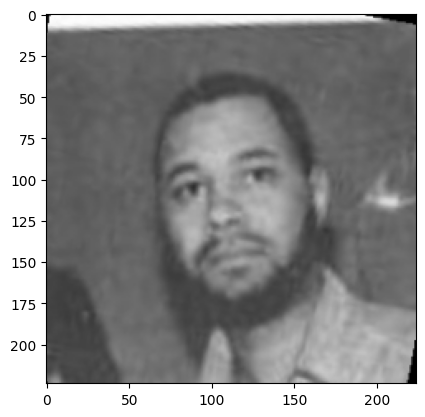

In [5]:
def show_image(image):
    image = cv2.cvtColor(np.uint8(image), cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    
image_data=img_processing('drive/MyDrive/facerecognize_images/Aaron_Patterson/Aaron_Patterson_0001.jpg', image_size)    
show_image(image_data)

In [6]:

def save_img(image, label):
    # Créer le répertoire new_images s'il n'existe pas déjà
    if not os.path.exists("new_images"):
        os.mkdir("new_images")

    # Créer le sous-répertoire correspondant à l'étiquette s'il n'existe pas déjà
    label_dir = os.path.join("new_images", label)
    if not os.path.exists(label_dir):
        os.mkdir(label_dir)

    # Récupérer le nombre d'images existantes avec le même label
    label_count = len(os.listdir(label_dir))

    # Sauvegarder l'image avec le nom "{label}_{label_count}.jpg"
    filename = f"{label}_{label_count}.jpg"
    filepath = os.path.join(label_dir, filename)
    cv2.imwrite(filepath, image)

    print(f"Image saved as {filepath}")



In [7]:
data_path="drive/MyDrive/facerecognize_images"
for im in os.listdir(data_path):
    image_path =os.path.join(data_path,im,'*' )
    image_path=glob.glob(image_path)
    for p in image_path:
     image=img_processing(p,image_size)
     save_img(image,im)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Image saved as new_images/Mark_Foley/Mark_Foley_0.jpg
Image saved as new_images/Mark_Hurlbert/Mark_Hurlbert_0.jpg
Image saved as new_images/Mark_Hurlbert/Mark_Hurlbert_1.jpg
Image saved as new_images/Mark_Hurlbert/Mark_Hurlbert_2.jpg
Image saved as new_images/Mark_Hurlbert/Mark_Hurlbert_3.jpg
Image saved as new_images/Mark_Hurlbert/Mark_Hurlbert_4.jpg
Image saved as new_images/Mark_Kelly/Mark_Kelly_0.jpg
Image saved as new_images/Mark_Hanson/Mark_Hanson_0.jpg
Image saved as new_images/Mark_Geragos/Mark_Geragos_0.jpg
Image saved as new_images/Mark_Geragos/Mark_Geragos_1.jpg
Image saved as new_images/Mark_Hogan/Mark_Hogan_0.jpg
Image saved as new_images/Mark_Hamister/Mark_Hamister_0.jpg
Image saved as new_images/Mark_Hamister/Mark_Hamister_1.jpg
Image saved as new_images/Mark_Gangloff/Mark_Gangloff_0.jpg
Image saved as new_images/Mark_Dacey/Mark_Dacey_0.jpg
Image saved as new_images/Mark_Dacey/Mark_Dacey_1.jpg


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

def get_model(input_shape=(224, 224, 3), num_classes=5749):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
   
    return model

model = get_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# définition des paramètres
batch_size = 16
img_height = 224
img_width = 224
num_classes = 5749
epochs = 10

# récupération du dataset
data_path = 'new_images'
train_ds = keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="training",
  seed=42,
  batch_size=batch_size,
  image_size=(img_height, img_width),
  labels="inferred",
  label_mode="int",
  color_mode="rgb",
  interpolation="bilinear",
  follow_links=False,
  smart_resize=False,
)

val_ds = keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="validation",
  labels='inferred',
  label_mode='int', 
  color_mode="rgb",
  seed=42,
  batch_size=batch_size,
  image_size=(img_height, img_width))

# mise en cache pour améliorer les performances
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

model = get_model()

# compilation du modèle
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

# entraînement du modèle
model.fit(train_ds,validation_data=val_ds,epochs=epochs)



Found 13254 files belonging to 5749 classes.
Using 10604 files for training.
Found 13254 files belonging to 5749 classes.
Using 2650 files for validation.
Epoch 1/10
120/663 [====>.........................] - ETA: 21:59 - loss: 9.0859 - accuracy: 0.0276